In [12]:
import os

run_folders = [os.environ["DATA"] + "/03_paper_popalg/05_guacamol/v2/10_baseline/",
               os.environ["DATA"] + "/03_paper_popalg/05_guacamol/v2/12_3_basic_act/",
               os.environ["DATA"] + "/03_paper_popalg/05_guacamol/v2/11_from_methane/"]

run_names = ["all actions",
             "primary actions",
             "from methane"]

output_fig_path = os.environ["FIGURES"] + "/03_paper_popalg/05_guacamol/all_boxplots.png"
               
figsize = (15, 20)

xlim_violin = (-0.1, 1.3)
xlim_boxplot = (-0.1, 1.1)


In [13]:
import pandas as pd
from os.path import join
import json

from IPython.display import display, HTML


def extract_data(run_folders, run_names):
    
    values = {}
    values["run"] = []
    values["benchmark"] = []
    values["score"] = []
    
    for i_run, run_folder in enumerate(run_folders):
            
        for i in range(1, 11):
            filename = join(run_folder, "output_v2_" + str(i) + ".json")
            with open(filename, "r") as f:
                j_obj = json.loads(f.read())
                for result in j_obj["results"]:

                    key = result["benchmark_name"]

                    values["score"].append(result["score"])
                    values["run"].append(run_names[i_run])
                    values["benchmark"].append(key)

    df_results = pd.DataFrame.from_dict(values)
    
#     display(HTML(df_results.to_html()))

    return df_results
    

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

def plot(run_folders, run_names, figsize, plot_type, xlim=None):
    
    df_results = extract_data(run_folders, run_names)
    
    sns.set_palette("colorblind")


    plt.figure(figsize=figsize)
    
    if xlim is not None:
        plt.xlim(xlim)
    
    if plot_type == "violin":
        sns.violinplot(x="score", y="benchmark", data=df_results, hue="run", legend=False)
        plt.legend(loc='upper left')
    elif plot_type == "boxplot":
        sns.boxplot(x="score", y="benchmark", data=df_results, hue="run")
    
    plt.savefig(output_fig_path, dpi=300)


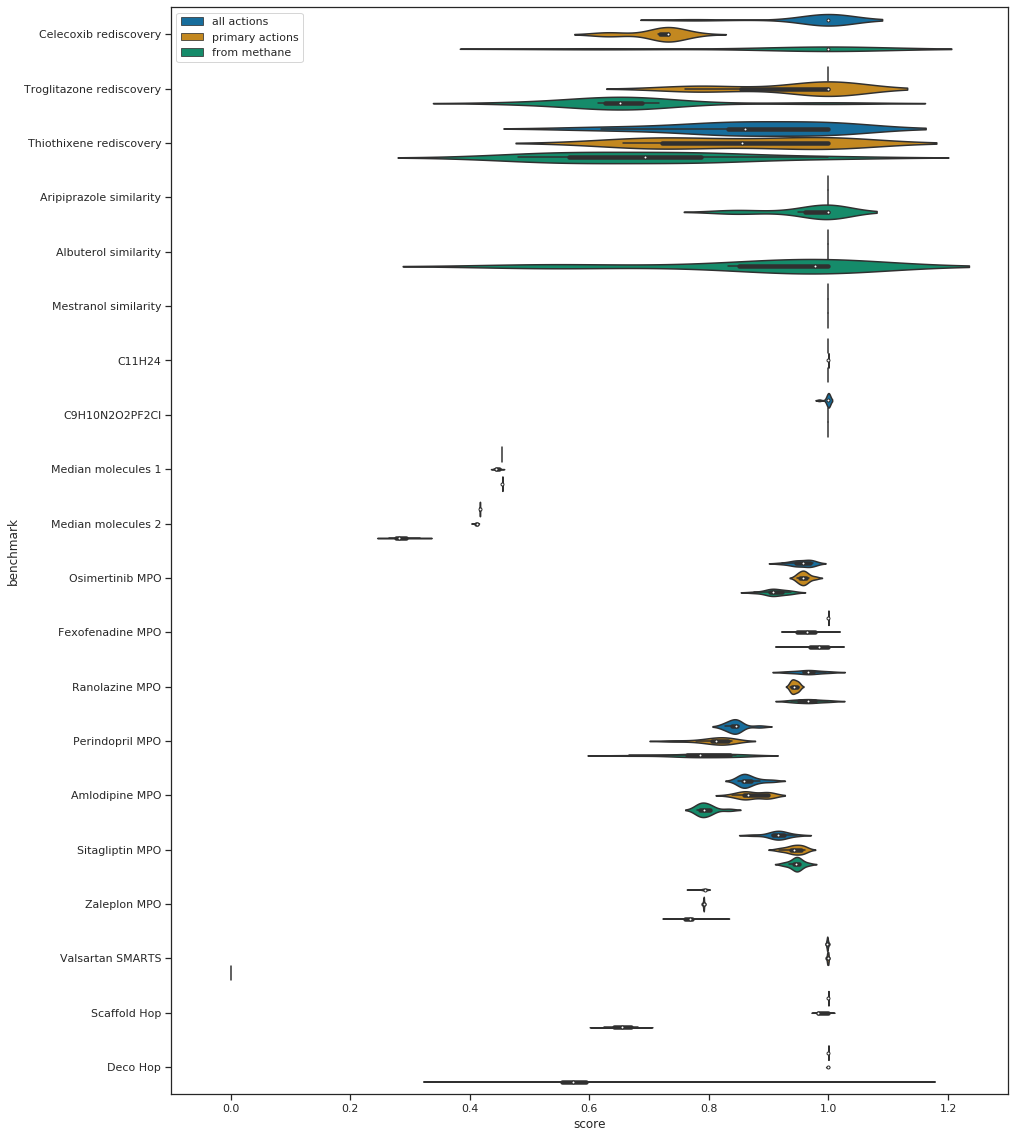

In [18]:
plot(run_folders, run_names, figsize, "violin", xlim=xlim_violin)

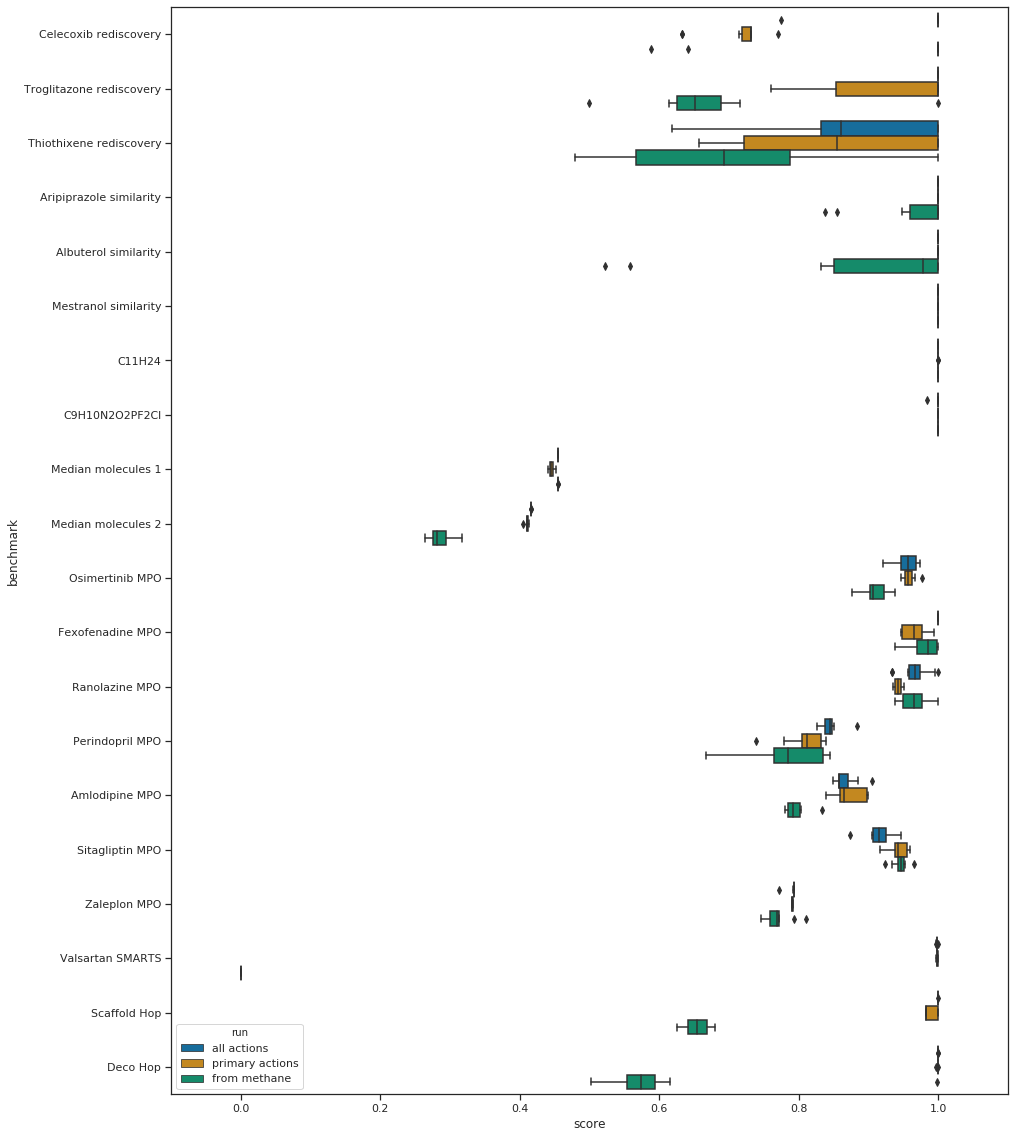

In [19]:
plot(run_folders, run_names, figsize, "boxplot", xlim=xlim_boxplot)